In [47]:
import os

import cv2
import mediapipe as mp
import numpy as np

In [48]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [49]:
# For static images:
test_files_dir = os.path.join(os.getcwd(), "./test_files")
IMAGE_FILES = [os.path.join(test_files_dir, f) for f in os.listdir(test_files_dir)]
BG_COLOR = (192, 192, 192)

/media/data/Projects/hearai/pose_estimation/./test_files/pose_ballet_test.jpg
Nose coordinates: (160.2920436859131, 152.30068889260292)


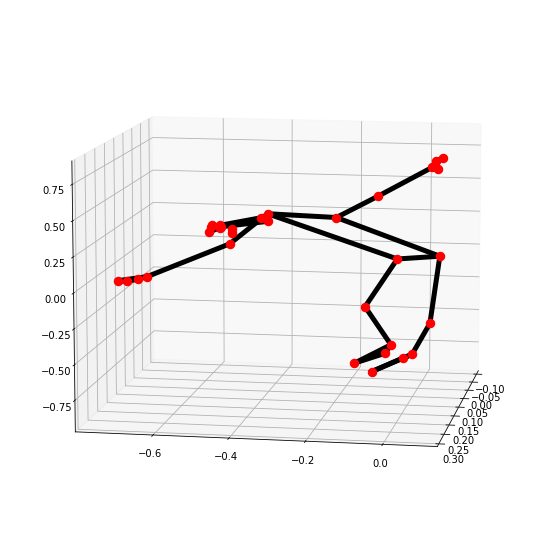

/media/data/Projects/hearai/pose_estimation/./test_files/faces_test.jpeg
Nose coordinates: (291.3264675140381, 578.9667441248894)


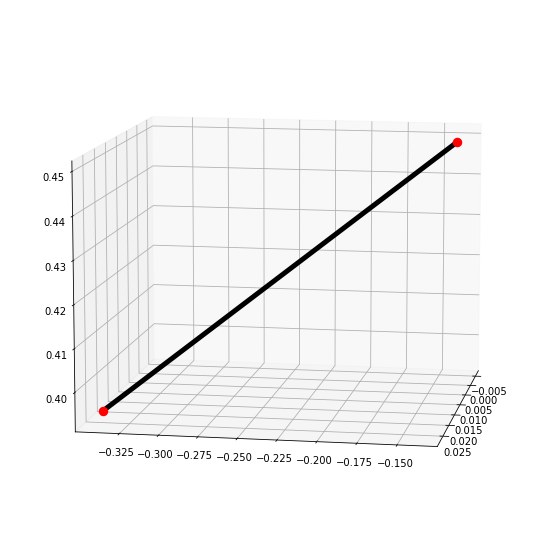

/media/data/Projects/hearai/pose_estimation/./test_files/poses_men_test.jpg


TypeError: '>' not supported between instances of 'NoneType' and 'float'

In [50]:
with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:
  for idx, file in enumerate(IMAGE_FILES):
    print(file)
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
      print(
          f'Nose coordinates: ('
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
      )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose, left and right hands, and face landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)